<a href="https://colab.research.google.com/github/Udit0104/ML/blob/main/Regression_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('placement (1).csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package (lpa)')

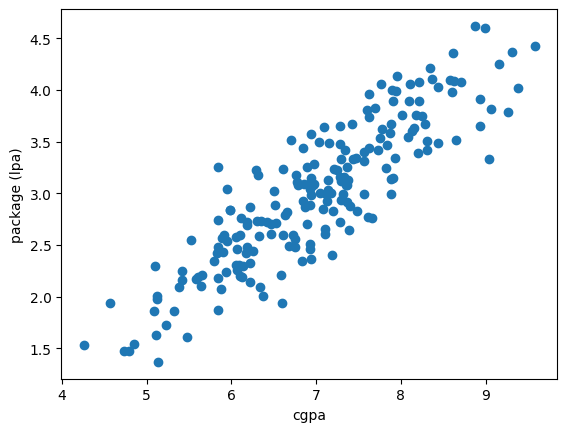

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package (lpa)')

In [5]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [7]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'package')

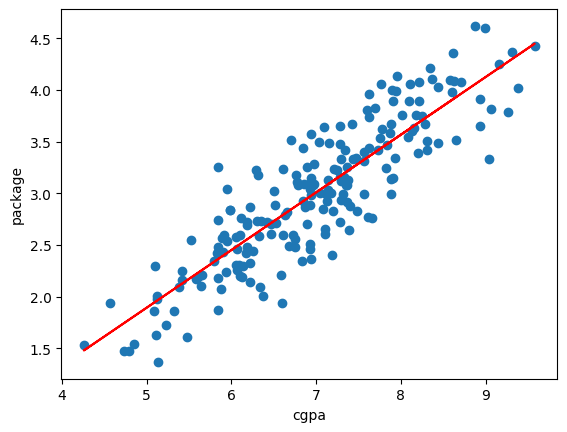

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
y_pred=lr.predict(X_test)

In [19]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [20]:
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  0.2884710931878175


In [21]:
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  0.12129235313495527


In [23]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  0.34827051717731616


In [25]:
print("R2 Score: ",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 Score:  0.780730147510384


In [27]:
# adjusted r2 score
X_test.shape

(40, 1)

In [28]:
1- ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [29]:
new_df1=df.copy()

In [30]:
new_df1['random_column']=np.random.random(200)
new_df1=new_df1[['cgpa','random_column','package']]
new_df1.head()

,cgpa,random_column,package
0,6.89,0.634371,3.26
1,5.12,0.366773,1.98
2,7.82,0.585330,3.25
3,7.42,0.008531,3.67
4,6.94,0.519036,3.57


In [31]:
# we will se that r2 score will remain the same but adjusted r2 score will decrease

X=new_df1.iloc[:,0:2]
y=new_df1.iloc[:,-1]

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
lr=LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=lr.predict(X_test)

In [40]:
print("R2 score: ",r2_score(y_test,y_pred))

R2 score:  0.7753412212614321


In [41]:
r2=r2_score(y_test,y_pred)

In [43]:
# new adjusted r2 score after adding a random input column
1 - ((1-r2)*(40-1)/(40-1-1)) # we can see that adj r2 score has decreased from the previous one

0.769429148136733

In [44]:
# adding a column that will affect the output

In [45]:
new_df2=df.copy()

In [46]:
new_df2['iq']=new_df2['package']+(np.random.randint(-12,12,200)/10)
new_df2=new_df2[['cgpa','iq','package']]

In [47]:
new_df2.head()

,cgpa,iq,package
0,6.89,2.26,3.26
1,5.12,1.98,1.98
2,7.82,3.05,3.25
3,7.42,4.37,3.67
4,6.94,4.07,3.57


Text(0, 0.5, 'package')

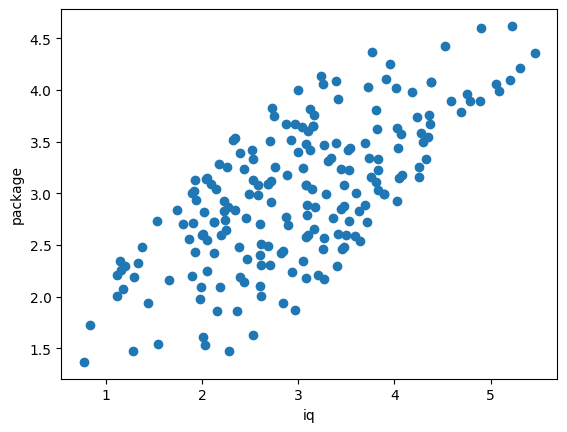

In [48]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package')

In [49]:
X=new_df2.iloc[:,0:2]
y=new_df2.iloc[:,-1]

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
lr=LinearRegression()

In [52]:
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred=lr.predict(X_test)

In [55]:
print("R2 Score: ",r2_score(y_test,y_pred))

R2 Score:  0.8541878116146492


In [56]:
r2=r2_score(y_test,y_pred)

In [58]:
# adjusted r2 score , Formula = 1-((1-r2)*(n-1)/(n-k-1))
1-((1-r2)*(40-1)/(40-1-2))

0.8463060717019275